<a href="https://colab.research.google.com/github/webercg/NLP---Daily-News-for-Stock-Market-Prediction/blob/main/Experimentos_%2B_EDA_(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 Importação de bibliotecas

In [466]:
#pip install transformers

In [467]:
#pip install lazypredict
#pip install googletrans==4.0.0-rc1
#pip install textblob
#pip install vaderSentiment

In [468]:
#Manipulação de dados
import pandas as pd
import numpy as np

#Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

#Manipulação datas
from datetime import datetime

# Prototipação
from lazypredict.Supervised import LazyClassifier


#Pipeline e pré-process
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


#Models
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import ExtraTreeClassifier

#Model Tunning
from sklearn.model_selection import GridSearchCV

#Model evaluation
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2.0 Leitura dos arquivos

## Leitura de Noticias

In [469]:
dicionario_mes_2021 = {'Jan':'01', 'Fev':'02', 'Mar':'03','Abr':'04', 'Mai':'05', 'Jun':'06','Jul':'07', 'Ago':'08', 'Set':'09','Out':'10', 'Nov':'11', 'Dec':'12'}
dicionario_mes_2020 = {'Jan':'01', 'Fev':'02', 'Mar':'03','Abr':'04', 'Mai':'05', 'Jun':'06','Jul':'07', 'Ago':'08', 'Set':'09','Out':'10', 'Nov':'11', 'Dez':'12'}
dicionario_mes_2022 = {'Jan':'01', 'Fev':'02', 'Mar':'03','Abr':'04', 'Mai':'05', 'Jun':'06'}

df = pd.DataFrame()

for i in dicionario_mes_2020.keys():
    arquivo = "dataset-2020/" + dicionario_mes_2020[i] + "_GoogleNews_Petr_" + i + "-2020.csv"
    df_leitura = pd.read_csv(arquivo, sep='|')
    df = df.append(df_leitura,ignore_index=True)

for i in dicionario_mes_2021.keys():
    arquivo = "dataset-2021/" + dicionario_mes_2021[i] + "_GoogleNews_Petr_" + i + "_21.csv"
    df_leitura = pd.read_csv(arquivo, sep='|')
    df = df.append(df_leitura,ignore_index=True)


for i in dicionario_mes_2022.keys():
    arquivo = "dataset-2022/" + dicionario_mes_2022[i] + "_GoogleNews_Petr_" + i + "_22.csv"
    df_leitura = pd.read_csv(arquivo, sep='|')
    df = df.append(df_leitura,ignore_index=True)

In [470]:
df.head()

,title,media,date,desc
0,Pré-sal: Centro Oeste fica com R$ 1 bilhão dos...,Correio Braziliense,01/01/2020,O dinheiro que será distribuído veio do leilão...
1,"Preço do etanol fecha 2019 em alta de 11,5% na...",Diario de Pernambuco,01/01/2020,O diesel foi o segundo combustível com maior a...
2,"Série ""Cineastas"" e mais dicas para curtir na ...",GZH,01/01/2020,"Cosmatos; e, por fim, às 23h15min, Rambo III (..."
3,Feriados em 2020: 11 datas serão em dias da se...,Money Times,01/01/2020,O dia 29 de fevereiro cairá em um sábado. Veja...
4,O incêndio que matou quase todos os macacos em...,BBC,01/01/2020,Principais notícias. Como a Petrobras virou te...


In [471]:
#Transformando coluna data para datetime:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

title            object
media            object
date     datetime64[ns]
desc             object
dtype: object

## Leitura dos pregões

In [472]:
## Lendo pregoes
df_petro = pd.read_csv('dataset-2021/Hist_Preço_Petr_2021_.csv', sep='|')
df_petro_2020 = pd.read_csv('dataset-2020/Hist_Preço_Petr_2020_.csv', sep='|')
df_petro_2022 = pd.read_csv('dataset-2022/Hist_Preço_Petr_2022_.csv', sep='|')
df_petro = df_petro_2020.append(df_petro,ignore_index=True)
df_petro = df_petro.append(df_petro_2022,ignore_index=True)
df_petro

,Date,Adj Close,Volume,Var%
0,2020-01-02,20.47,37774500,0.02
1,2020-01-03,20.30,71595600,-0.01
2,2020-01-06,20.54,81844000,0.01
3,2020-01-07,20.46,32822000,-0.00
4,2020-01-08,20.33,48215600,-0.01
...,...,...,...,...
614,2022-06-24,26.29,53413400,-0.01
615,2022-06-27,27.98,90417700,0.06
616,2022-06-28,28.33,51388000,0.01
617,2022-06-29,28.08,52048800,-0.01


In [473]:
#Transformando a coluna Date para datetime
df_petro['Date'] = pd.to_datetime(df_petro['Date'])
df_petro.dtypes

Date         datetime64[ns]
Adj Close           float64
Volume                int64
Var%                float64
dtype: object

# 4.0 Pré-Processamento

## 4.1 Padronização das palavras contidas nos títulos das noticias para minúsculo

In [474]:
df.head()

,title,media,date,desc
0,Pré-sal: Centro Oeste fica com R$ 1 bilhão dos...,Correio Braziliense,2020-01-01,O dinheiro que será distribuído veio do leilão...
1,"Preço do etanol fecha 2019 em alta de 11,5% na...",Diario de Pernambuco,2020-01-01,O diesel foi o segundo combustível com maior a...
2,"Série ""Cineastas"" e mais dicas para curtir na ...",GZH,2020-01-01,"Cosmatos; e, por fim, às 23h15min, Rambo III (..."
3,Feriados em 2020: 11 datas serão em dias da se...,Money Times,2020-01-01,O dia 29 de fevereiro cairá em um sábado. Veja...
4,O incêndio que matou quase todos os macacos em...,BBC,2020-01-01,Principais notícias. Como a Petrobras virou te...


In [475]:
df['title'] = df['title'].apply(lambda x: x.lower())
df

,title,media,date,desc
0,pré-sal: centro oeste fica com r$ 1 bilhão dos...,Correio Braziliense,2020-01-01,O dinheiro que será distribuído veio do leilão...
1,"preço do etanol fecha 2019 em alta de 11,5% na...",Diario de Pernambuco,2020-01-01,O diesel foi o segundo combustível com maior a...
2,"série ""cineastas"" e mais dicas para curtir na ...",GZH,2020-01-01,"Cosmatos; e, por fim, às 23h15min, Rambo III (..."
3,feriados em 2020: 11 datas serão em dias da se...,Money Times,2020-01-01,O dia 29 de fevereiro cairá em um sábado. Veja...
4,o incêndio que matou quase todos os macacos em...,BBC,2020-01-01,Principais notícias. Como a Petrobras virou te...
...,...,...,...,...
7978,petrobras retoma venda de três refinarias: sai...,Gazeta do Povo,2022-06-30,"Refinarias da Petrobras em Pernambuco, Paraná ..."
7979,governo avalia mecanismo para obrigar petrobra...,BiodieselBR.com,2022-06-30,A Petrobras chegou a assinar em 2019 um acordo...
7980,postos petrobras e shell se rendem à recarga d...,Quatro Rodas,2022-06-30,O eletroposto foi instalado no posto Petrobras...
7981,ações petrobras: saiba o preço após fechamento...,UOL Economia,2022-06-30,As ações da Petrobras fecharam em queda nesta ...


## 4.2 Exclusão noticias que não contenham a palavra chave "Petrobras" no título
Embora tenha-se configurado A biblioteca GoogleNews() para baixar noticias pela palavra chave "Petrobras" pode ocorrer casos em que o termo não é citado no título e nem no corpo da noticia.

In [476]:
df.iloc[2][0]

'série "cineastas" e mais dicas para curtir na tv nesta quarta-feira'

In [477]:
df.iloc[2][3]

'Cosmatos; e, por fim, às 23h15min, Rambo III (1988), de Peter MacDonald.  Especial Lenine e Petrobras Sinfônica - TV Brasil, 22h. Concerto especial  com o...'

In [478]:
df['title'] = df['title'].apply(lambda x: "" if "petrobras" not in x else x)
df

,title,media,date,desc
0,,Correio Braziliense,2020-01-01,O dinheiro que será distribuído veio do leilão...
1,,Diario de Pernambuco,2020-01-01,O diesel foi o segundo combustível com maior a...
2,,GZH,2020-01-01,"Cosmatos; e, por fim, às 23h15min, Rambo III (..."
3,,Money Times,2020-01-01,O dia 29 de fevereiro cairá em um sábado. Veja...
4,,BBC,2020-01-01,Principais notícias. Como a Petrobras virou te...
...,...,...,...,...
7978,petrobras retoma venda de três refinarias: sai...,Gazeta do Povo,2022-06-30,"Refinarias da Petrobras em Pernambuco, Paraná ..."
7979,governo avalia mecanismo para obrigar petrobra...,BiodieselBR.com,2022-06-30,A Petrobras chegou a assinar em 2019 um acordo...
7980,postos petrobras e shell se rendem à recarga d...,Quatro Rodas,2022-06-30,O eletroposto foi instalado no posto Petrobras...
7981,ações petrobras: saiba o preço após fechamento...,UOL Economia,2022-06-30,As ações da Petrobras fecharam em queda nesta ...


In [479]:
df = df[(df['title'] != "")]
df

,title,media,date,desc
10,indústria tem maior nível de emprego em 4 anos...,G1,2020-02-01,Indústria tem maior nível de emprego em 4 anos...
11,"clarissa lins, do ibp, renuncia como integrant...",Época Negócios,2020-02-01,A Petrobras informa que a conselheira de admin...
12,petrobras viverá momento de transformação nos ...,Valor Econômico,2020-02-01,Os anos 2020 prometem ser de profundas transfo...
20,governo não descarta intervir na petrobras par...,Blog do Correio Braziliense,2020-03-01,Assessores próximos do presidente Jair Bolsona...
21,postos aguardam petrobras para reajustar preço...,Metrópoles,2020-03-01,Postos aguardam Petrobras para reajustar preço...
...,...,...,...,...
7977,"petrobras pagará r$ 30,9 bi por plataformas",Valor Econômico,2022-06-30,O resultado da licitação internacional bilioná...
7978,petrobras retoma venda de três refinarias: sai...,Gazeta do Povo,2022-06-30,"Refinarias da Petrobras em Pernambuco, Paraná ..."
7979,governo avalia mecanismo para obrigar petrobra...,BiodieselBR.com,2022-06-30,A Petrobras chegou a assinar em 2019 um acordo...
7980,postos petrobras e shell se rendem à recarga d...,Quatro Rodas,2022-06-30,O eletroposto foi instalado no posto Petrobras...


### Dispersão das fontes de notícias

In [480]:
dfmed1 = df
dfmed1['media'] = dfmed1['media'].str.replace('Click Petróleo e Gás','CPG Click Petroleo e Gas')
dfmed = dfmed1.groupby(['media']).count()
dfmed.sort_values(by='title', ascending=False, inplace=True)
dfmed.reset_index(inplace=True)
totnot = dfmed['title'].sum()
dfmed['title'] = pd.to_numeric(dfmed['title'])
dfmed['perc'] = ((dfmed['title'] / totnot) *100)
dfmed['perc'] = dfmed['perc'].round(2)

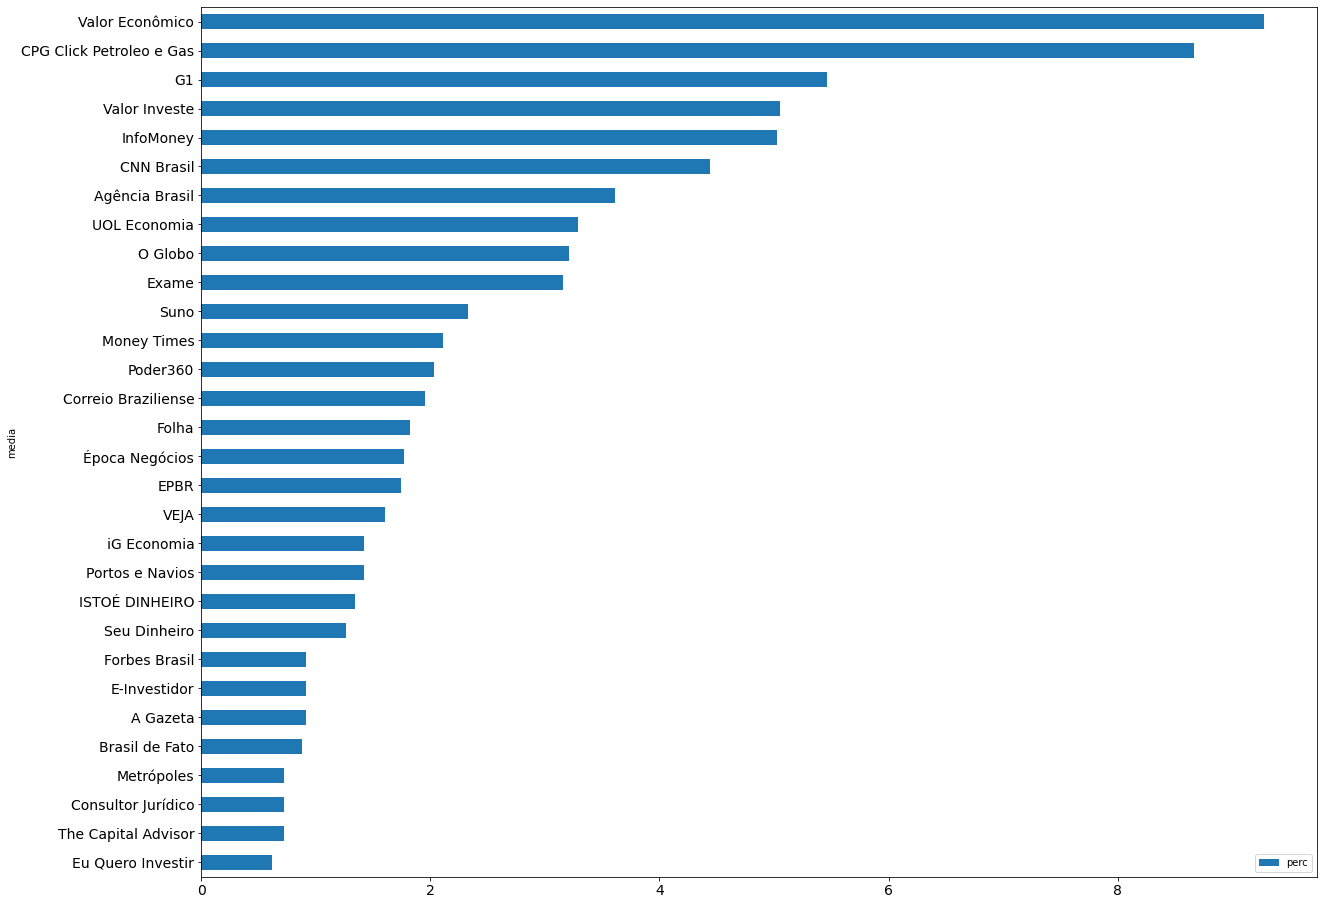

In [481]:
dfmed.sort_values(by='perc', ascending=False, inplace=True)
dfmed.reset_index(inplace=True)
dfmed = dfmed.head(30)
dfmed.sort_index(ascending=False).plot(kind='barh',x='media', y='perc', figsize=(20,16),fontsize=(14))

## 4.4 Adição de classe "Fechamento" ao dataframe de Ações
Classe 1: Fechamento em alta  
Classe 0: Fechamento em queda  

In [482]:
df_petro

,Date,Adj Close,Volume,Var%
0,2020-01-02,20.47,37774500,0.02
1,2020-01-03,20.30,71595600,-0.01
2,2020-01-06,20.54,81844000,0.01
3,2020-01-07,20.46,32822000,-0.00
4,2020-01-08,20.33,48215600,-0.01
...,...,...,...,...
614,2022-06-24,26.29,53413400,-0.01
615,2022-06-27,27.98,90417700,0.06
616,2022-06-28,28.33,51388000,0.01
617,2022-06-29,28.08,52048800,-0.01


In [483]:
df_petro['Fechamento'] = df_petro['Var%'].apply(lambda x: 0 if x<0 else 1)
df_petro

,Date,Adj Close,Volume,Var%,Fechamento
0,2020-01-02,20.47,37774500,0.02,1
1,2020-01-03,20.30,71595600,-0.01,0
2,2020-01-06,20.54,81844000,0.01,1
3,2020-01-07,20.46,32822000,-0.00,0
4,2020-01-08,20.33,48215600,-0.01,0
...,...,...,...,...,...
614,2022-06-24,26.29,53413400,-0.01,0
615,2022-06-27,27.98,90417700,0.06,1
616,2022-06-28,28.33,51388000,0.01,1
617,2022-06-29,28.08,52048800,-0.01,0


In [484]:
df_petro.Fechamento.value_counts()

1    319
0    300
Name: Fechamento, dtype: int64

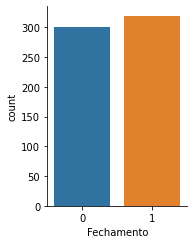

In [485]:
sns.catplot(x="Fechamento",
                data=df_petro,
                kind="count", height=3.5, aspect=.8)

Em 2022 houve 65 fechamentos com aumento nos valores de ações da Petrobras e 59 com fechamento em queda.

## 4.5 Concatenar noticias diárias

In [486]:
df_petro.head()

,Date,Adj Close,Volume,Var%,Fechamento
0,2020-01-02,20.47,37774500,0.02,1
1,2020-01-03,20.30,71595600,-0.01,0
2,2020-01-06,20.54,81844000,0.01,1
3,2020-01-07,20.46,32822000,-0.00,0
4,2020-01-08,20.33,48215600,-0.01,0


In [487]:
df.head()

,title,media,date,desc
10,indústria tem maior nível de emprego em 4 anos...,G1,2020-02-01,Indústria tem maior nível de emprego em 4 anos...
11,"clarissa lins, do ibp, renuncia como integrant...",Época Negócios,2020-02-01,A Petrobras informa que a conselheira de admin...
12,petrobras viverá momento de transformação nos ...,Valor Econômico,2020-02-01,Os anos 2020 prometem ser de profundas transfo...
20,governo não descarta intervir na petrobras par...,Blog do Correio Braziliense,2020-03-01,Assessores próximos do presidente Jair Bolsona...
21,postos aguardam petrobras para reajustar preço...,Metrópoles,2020-03-01,Postos aguardam Petrobras para reajustar preço...


In [488]:
lista_datas = []
lista_news = []

for i in df.date.unique():
    news = ""
    for row in df[(df['date']==i)].iterrows():
        news = news + " " + row[1][0]
    lista_news.append(news)
    lista_datas.append(i)

In [489]:
pd.set_option('display.max_rows', 50)

In [490]:
df_news_diaria = pd.DataFrame(list(zip(lista_datas,lista_news)),
               columns =['Date', 'Noticias'])
df_news_diaria.sort_values(by = 'Date', ascending = True, inplace = True)
df_news_diaria

,Date,Noticias
27,2020-01-02,petrobras e vale retiram seus funcionários de...
53,2020-01-03,petrobras reduz preços do diesel e da gasolin...
81,2020-01-04,petrobras faz redução em produção de petróleo...
128,2020-01-06,petrobras avança processo de venda de campos ...
148,2020-01-07,o adeus da petrobras ao amazonas petrobras vê...
...,...,...
641,2022-12-02,bolsonaro diz que trabalha com petrobras para...
661,2022-12-03,"bolsonaro diz que petrobras tem ""lucro absurd..."
691,2022-12-04,comitê da petrobras aprova nome de josé mauro...
718,2022-12-05,guedes diz que encaminhará ‘imediatamente’ es...


## 4.6 Concatenar noticias referentes a datas sem pregões.

- O próximo dia útil após o periodo sem pregões deverá consolidar as noticias acumuladas dos dias sem pregões.
- O dataset final deverá conter apenas as datas em que ocorreu o pregão

Dessa forma, iniciaremos o procedimento, concatenando as noticias de dias que não houveram pregões

In [491]:
## Iterar sobre as datas dos pregões (iniciando pelo segundo dia do pregão de 2021 df_petro.Date.iloc[1:])

## Calcular delta (diferença entre dias entre dois registros seguidos de pregões):
import datetime

df_news_sem_pregao = pd.DataFrame()
timedelta_1dia = datetime.timedelta(days=1)

lista_datas = []
lista_noticias_sem_pregao = []

for i, data in enumerate(df_petro.Date.iloc[1:]):
    data_anterior = df_petro['Date'].iloc[i]  
    delta = data - data_anterior

    
    # Se houver mais de 1 dia sem pregão:    
    if delta > timedelta_1dia:
            
            
        # Filtra as noticias entre as datas sem pregão:
        df_aux = df_news_diaria[ (df_news_diaria['Date']> data_anterior) & (df_news_diaria['Date']<= data)  ]
        
        ## Concatena as noticias das datas sem pregão
        news = ""
        for row in df_aux.iterrows():
            news = news + " " + row[1][1]


        ## Armazena as noticias e data do ultimo pregão valido em listas
        lista_noticias_sem_pregao.append(news)
        lista_datas.append(data)
        
        #Cria um dataframe auxiliar com a data do ultimo pregão e as noticias concatenadas dos dias sem pregões:
        df_aux2 = pd.DataFrame(list(zip(lista_datas,lista_noticias_sem_pregao)),
               columns =['Date', 'Noticias'])
    
        # Gera o dataframe com as noticias sem pregões + datas do ultimo pregão valido.
        df_news_sem_pregao = df_news_sem_pregao.append(df_aux2, ignore_index = True)
        
        #Resetando as listas para geração de novo DF
        lista_noticias_sem_pregao = []
        lista_datas = []
        
df_news_sem_pregao

,Date,Noticias
0,2020-01-06,petrobras faz redução em produção de petróle...
1,2020-01-13,quase fechada a venda de refinaria da petrob...
2,2020-01-20,"após bb, petrobras também anuncia que aposen..."
3,2020-01-27,demissões em empresa da petrobras em araucár...
4,2020-02-03,indústria tem maior nível de emprego em 4 an...
...,...,...
134,2022-06-06,governo indica josé mauro ferreira coelho pa...
135,2022-06-13,defasagem de combustíveis se sustenta nas re...
136,2022-06-17,petrobras anuncia reajuste da gasolina e do ...
137,2022-06-20,bolsonaro faz novos ataques à petrobras por ...


## 4.7 Atualiza as noticias concatenadas no df_news_diaria:

In [492]:
df_news_diaria_atualizada = df_news_diaria.copy()

# itera sobre os dias com pregão cujo noticias de dias anteriores foram concatenadas:
for data in df_news_sem_pregao.Date.unique():
    
    #Filtra pelo dia com pregão que teve noticias concatenada
    df_noticia_dias_sem_pregao = df_news_sem_pregao[(df_news_sem_pregao['Date']==data)]


    #Checa se há registro referente a data no df de noticias
    df_check_noticias = df_news_diaria_atualizada[(df_news_diaria_atualizada['Date']==data)]
    
    # Se não houver registros referente á data então o registro deverá ser criado no df de noticias:
    # Se houver, então o registro será atualizado no df de noticias
    
    if len(df_check_noticias) > 0:
        
        #Substitui os registros
        df_news_diaria_atualizada = df_news_diaria_atualizada.replace ((df_news_diaria_atualizada.loc[df_news_diaria_atualizada['Date'].isin(df_noticia_dias_sem_pregao['Date'])])['Noticias'].values, df_noticia_dias_sem_pregao['Noticias'].values)
        
    else:
        #Insere o novo registro
        df_news_diaria_atualizada = df_news_diaria_atualizada.append(df_noticia_dias_sem_pregao, ignore_index = True)

In [493]:
len(df_news_diaria), len(df_news_diaria_atualizada)

(767, 785)

## 4.8 Mesclando o dataframe noticias finais e ações

In [494]:
df_final = pd.merge(left = df_petro, right = df_news_diaria_atualizada, how = 'left', on = 'Date')
df_final.head(10)

,Date,Adj Close,Volume,Var%,Fechamento,Noticias
0,2020-01-02,20.47,37774500,0.02,1,petrobras e vale retiram seus funcionários de...
1,2020-01-03,20.30,71595600,-0.01,0,petrobras reduz preços do diesel e da gasolin...
2,2020-01-06,20.54,81844000,0.01,1,petrobras faz redução em produção de petróle...
3,2020-01-07,20.46,32822000,-0.00,0,o adeus da petrobras ao amazonas petrobras vê...
4,2020-01-08,20.33,48215600,-0.01,0,NaN
5,2020-01-09,20.27,36102700,-0.00,0,refinarias da petrobras apresentam queda na c...
6,2020-01-10,20.18,25397500,-0.00,0,petrobras pode criar subsidiárias para vender...
7,2020-01-13,20.22,30676800,0.00,1,quase fechada a venda de refinaria da petrob...
8,2020-01-14,20.00,39796500,-0.01,0,fábrica de fertilizantes da petrobras no para...
9,2020-01-15,19.70,34405700,-0.02,0,petrobras vende ativos na nigéria e encerra a...


In [495]:
df_news_diaria_atualizada.head(12)

,Date,Noticias
0,2020-01-02,petrobras e vale retiram seus funcionários de...
1,2020-01-03,petrobras reduz preços do diesel e da gasolin...
2,2020-01-04,petrobras faz redução em produção de petróleo...
3,2020-01-06,petrobras faz redução em produção de petróle...
4,2020-01-07,o adeus da petrobras ao amazonas petrobras vê...
5,2020-01-09,refinarias da petrobras apresentam queda na c...
6,2020-01-10,petrobras pode criar subsidiárias para vender...
7,2020-01-11,quase fechada a venda de refinaria da petrobr...
8,2020-01-12,petrobras vende áreas de produção e abre espa...
9,2020-01-13,quase fechada a venda de refinaria da petrob...


In [496]:
df_final[(df_final['Noticias'].isnull())].Date, len(df_final[(df_final['Noticias'].isnull())].Date)

(4     2020-01-08
 25    2020-02-06
 28    2020-02-11
 31    2020-02-14
 43    2020-03-05
          ...    
 600   2022-06-03
 602   2022-06-07
 603   2022-06-08
 604   2022-06-09
 605   2022-06-10
 Name: Date, Length: 76, dtype: datetime64[ns],
 76)

No total houveram 76 registros de pregões sem atribuição de noticias.

Para esses registros observou-se que:  

**1) Não houveram noticias na respectiva data e/ou**  
**2) Considerando as datas sem pregões que antecederam a data do pregão também não houveram noticias.**  

In [497]:
len(df_final), len(df_final[(df_final['Noticias'].isnull())].Date)

(619, 76)

## 4.9 Exclusão dias com pregões sem noticias

In [498]:
df_final = df_final.dropna()

In [499]:
len(df_final)

543

In [500]:
df_final2 = df_final.copy()

## 6.0 Frequencia de palavras e inviesamento positivo/negativo em 2020 e 2021

In [501]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [502]:
df_palavras = df_final2.copy()
df_palavras = df_palavras[(df_palavras['Date'] <= parser.parse('2021-12-31'))]

a = df_palavras['Noticias']
a = list(a)
len(a)

447

In [503]:
c = ""
for i in a:
    c += i

In [504]:
frase = c
palavras = nltk.word_tokenize(frase)

In [505]:
frequencia = FreqDist(frase)
fdist = FreqDist(palavras)
fdist.most_common(80)

[('petrobras', 2451),
 ('de', 1942),
 ('da', 1123),
 ('e', 828),
 (',', 818),
 ('em', 622),
 ('para', 504),
 ('a', 496),
 ('do', 477),
 ('...', 469),
 ('no', 377),
 ('na', 372),
 ('com', 316),
 ('$', 264),
 (':', 254),
 ('%', 251),
 ('que', 249),
 ('venda', 227),
 ('por', 225),
 ('(', 219),
 (')', 217),
 ('o', 212),
 ('r', 188),
 ('diz', 168),
 ('gás', 164),
 ('mais', 158),
 ('gasolina', 147),
 ('petróleo', 145),
 (';', 134),
 ('preço', 128),
 ('é', 124),
 ('petr4', 121),
 ('bolsonaro', 120),
 ('não', 113),
 ('campos', 103),
 ('ações', 102),
 ('após', 99),
 ('preços', 95),
 ('diesel', 94),
 ('à', 94),
 ('refinaria', 90),
 ('vai', 88),
 ('pela', 88),
 ('refinarias', 84),
 ('anuncia', 83),
 ('us', 80),
 ('bacia', 77),
 ('sobre', 75),
 ('dos', 73),
 ('combustíveis', 73),
 ('ao', 70),
 ('campo', 70),
 ('vale', 69),
 ('bi', 69),
 ('tem', 68),
 ('milhões', 64),
 ('produção', 62),
 ('se', 62),
 ('até', 62),
 ('pré-sal', 62),
 ('alta', 62),
 ('contrato', 62),
 ('pode', 61),
 ('bilhões', 60),
 

## Remoção de stopwords

In [506]:
stopwords = nltk.corpus.stopwords.words('portuguese')
def Removestopwords(instancia):
    instancia = instancia.lower()
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

caracteres = [",","...", "("," )" ,":", "$",  "%",  ";", "'", "(PETR4)", "PETR4", "petr4","(petr4)" ]
d = Removestopwords(c)

In [507]:
carac = "!@#$;:,%')(?’‘"
for i in range(0,len(carac)):
     d =d.replace(carac[i],"")

carac2 = "..."
for i in range(0,len(carac2)):
     d =d.replace(carac2[i],"")
        
frase = d
palavras = nltk.word_tokenize(frase)

frequencia = FreqDist(frase)
fdist = FreqDist(palavras)
fdist.most_common(80)

[('petrobras', 2450),
 ('venda', 226),
 ('r', 181),
 ('diz', 168),
 ('gás', 164),
 ('gasolina', 147),
 ('petróleo', 145),
 ('preço', 128),
 ('bolsonaro', 120),
 ('petr4', 116),
 ('campos', 103),
 ('ações', 102),
 ('após', 99),
 ('diesel', 96),
 ('preços', 95),
 ('refinaria', 90),
 ('vai', 88),
 ('refinarias', 84),
 ('anuncia', 83),
 ('bacia', 77),
 ('us', 76),
 ('sobre', 75),
 ('combustíveis', 73),
 ('campo', 71),
 ('vale', 69),
 ('bi', 69),
 ('milhões', 64),
 ('produção', 62),
 ('pré-sal', 62),
 ('alta', 62),
 ('contrato', 62),
 ('pode', 61),
 ('bilhões', 60),
 ('dividendos', 57),
 ('presidente', 56),
 ('novo', 54),
 ('política', 54),
 ('brasil', 52),
 ('plataforma', 50),
 ('plataformas', 50),
 ('vende', 48),
 ('rio', 47),
 ('offshore', 46),
 ('vender', 46),
 ('governo', 46),
 ('mercado', 46),
 ('bahia', 44),
 ('lucro', 44),
 ('contratos', 43),
 ('maior', 43),
 ('fecha', 41),
 ('contra', 41),
 ('reajuste', 41),
 ('empresa', 40),
 ('vagas', 40),
 ('empresas', 39),
 ('privatização', 39)

In [508]:
# Cria uma lista das n palavras mais frequentes
mais_frequentes = []
frequencia_values = []

for tupla in fdist.most_common(15):     ## fdist.most_common(15) retorna 15 palavras mais frequentes
    mais_frequentes.append(tupla[0])
    frequencia_values.append(tupla[1])

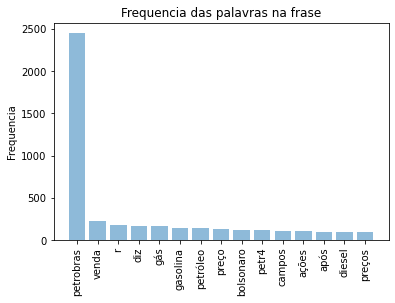

In [509]:
#%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

palavras = mais_frequentes
y_pos = np.arange(len(palavras))
contagem = frequencia_values

plt.bar(y_pos, contagem, align='center', alpha=0.5)
plt.xticks(y_pos, palavras,rotation='vertical' )
plt.ylabel('Frequencia')
plt.title('Frequencia das palavras na frase')

plt.show()

## 6.1 Inviesamento

In [510]:
df_palavras = df_final2.copy()
df_palavras.head()

,Date,Adj Close,Volume,Var%,Fechamento,Noticias
0,2020-01-02,20.47,37774500,0.02,1,petrobras e vale retiram seus funcionários de...
1,2020-01-03,20.30,71595600,-0.01,0,petrobras reduz preços do diesel e da gasolin...
2,2020-01-06,20.54,81844000,0.01,1,petrobras faz redução em produção de petróle...
3,2020-01-07,20.46,32822000,-0.00,0,o adeus da petrobras ao amazonas petrobras vê...
5,2020-01-09,20.27,36102700,-0.00,0,refinarias da petrobras apresentam queda na c...


In [511]:
## Copiando apenas até o mes 4
from dateutil import parser

df_palavras = df_palavras[(df_palavras['Date'] <= parser.parse('2021-12-31'))]
df_palavras

,Date,Adj Close,Volume,Var%,Fechamento,Noticias
0,2020-01-02,20.47,37774500,0.02,1,petrobras e vale retiram seus funcionários de...
1,2020-01-03,20.30,71595600,-0.01,0,petrobras reduz preços do diesel e da gasolin...
2,2020-01-06,20.54,81844000,0.01,1,petrobras faz redução em produção de petróle...
3,2020-01-07,20.46,32822000,-0.00,0,o adeus da petrobras ao amazonas petrobras vê...
5,2020-01-09,20.27,36102700,-0.00,0,refinarias da petrobras apresentam queda na c...
...,...,...,...,...,...,...
490,2021-12-23,23.24,28713600,0.01,1,programa da petrobras que reforça capital de ...
491,2021-12-27,23.58,44227900,0.01,1,"petrobras vende carmópolis por us$ 1,1 bilhã..."
492,2021-12-28,23.61,30688100,0.00,1,distribuidoras de gás de 5 estados entram na ...
493,2021-12-29,23.41,35508400,-0.01,0,petrobras vai recorrer de decisão que suspend...


In [512]:
df_palavras.columns

Index(['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias'], dtype='object')

In [513]:
# Cria uma lista das n palavras mais frequentes
mais_frequentes = []
frequencia_values = []

for tupla in fdist.most_common(500):     ## fdist.most_common(15) retorna 15 palavras mais frequentes
    
    if tupla[0] not in ["``","''",'petr3petr4','445','114']:            ## CONDIÇÃO NECESSÁRIA PARA NÃO DAR ERRO NO DATAFRAME POSTERIORMENTE

        mais_frequentes.append(tupla[0])
        frequencia_values.append(tupla[1])

In [514]:
## Cria uma coluna no df com cada palavra retornada no passo anterior
for palavra in mais_frequentes:
    df_palavras[palavra] = df_palavras['Noticias'].apply(lambda x: 1 if palavra in x else 0)
df_palavras.head()

,Date,Adj Close,Volume,Var%,Fechamento,Noticias,petrobras,venda,r,diz,...,pretende,2025,traz,uso,sugere,nega,altas,diretor,cargo,vale-gás
0,2020-01-02,20.47,37774500,0.02,1,petrobras e vale retiram seus funcionários de...,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-03,20.30,71595600,-0.01,0,petrobras reduz preços do diesel e da gasolin...,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-06,20.54,81844000,0.01,1,petrobras faz redução em produção de petróle...,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-07,20.46,32822000,-0.00,0,o adeus da petrobras ao amazonas petrobras vê...,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,2020-01-09,20.27,36102700,-0.00,0,refinarias da petrobras apresentam queda na c...,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [515]:
#'defende' in 'bolsonaro protege e pede para defender'

In [516]:
#string='bolsonaro protege e pede para defender'
#output=string.split(' ')
#output

In [517]:
#'defende' in 'bolsonaro protege e pede para defender'.split(' ')

In [518]:
qtde_alta = []
qtde_baixa = []
tendencia_alta_valores = []
lista_polaridade = []

for palavra in mais_frequentes:
    
    print(palavra)
    #Filtrando a quantidade de fechamentos alta/baixa por palavra
    serie = df_palavras[df_palavras[str(palavra)]==1].Fechamento.value_counts()
    
    #Encontrando qtde de registros de alta e de baixa
    tamanho = len(serie)
    

    if tamanho == 2:
        baixas = serie[0]
        altas = serie[1]

    else:
        tamanho_index = len(serie.axes[0])
            
        #tratamento de palavras especiais que são usadas no dominio do python e que nao retorna a serie por ex aspas “
        if tamanho_index == 0:
                
            baixas = 0
            altas = 0
            print(palavra)
            
        #Tratamento da maioria das outras palavras
        else:
            index = serie.axes[0][0]
                
        
            #Se só há exemplos dessa palavra com fechamento negativo entao seguir:
            if index == 0:
                baixas = serie[0]
                altas = 0
                #print(baixas)

           #Se só há exemplso dessa palavra com fechamento positivo entao seguir:
            else:
                baixas = 0
                altas = serie[1]
                #print(altas)
    
    total = baixas+altas
    
    #tratamento de palavras especiais que são usadas no dominio do python e que nao retorna a serie por ex aspas “
    if total == 0:
        total = 1
        
    tendencia_alta = altas/total
    
    #Verificando se há polaridade atribuida a essa palavra no dicionário sentilex
    pola = dic_palavra_polaridade.get('palavra')
    
    #Armazenando os resultados
    qtde_alta.append(altas)
    qtde_baixa.append(baixas)
    tendencia_alta_valores.append(tendencia_alta)
    lista_polaridade.append(pola)

petrobras
venda
r
diz
gás
gasolina
petróleo
preço
bolsonaro
petr4
campos
ações
após
diesel
preços
refinaria
vai
refinarias
anuncia
bacia
us
sobre
combustíveis
campo
vale
bi
milhões
produção
pré-sal
alta
contrato
pode
bilhões
dividendos
presidente
novo
política
brasil
plataforma
plataformas
vende
rio
offshore
vender
governo
mercado
bahia
lucro
contratos
maior
fecha
contra
reajuste
empresa
vagas
empresas
privatização
anos
5
“
aumento
deve
sobe
mil
inicia
quer
natural
ativos
conclui
nova
partir
recorde
reduz
faz
queda
3
valor
4
funcionários
óleo
ação
”
fpso
compra
ibovespa
-
ano
acordo
participação
cozinha
assina
polo
macaé
projeto
combustível
1
aprova
santos
cai
cvm
2
veja
abre
ainda
greve
2021
plano
10
estatal
operação
br
dia
es
emprego
eleva
paraná
aumenta
distribuidoras
recebe
destaques
petroleiros
confirma
2020
justiça
oferta
búzios
pagar
distribuidora
silva
luna
guedes
meio
conselho
anp
covid-19
avança
processo
petrorio
acionistas
quase
volta
serviços
trimestre
petr3
lava
braskem
fa

In [519]:
#serie = df_palavras[df_palavras[str('defende')]==1]
#tamanho = len(serie)
#tamanho
#len(serie.axes[0])

In [520]:
#serie

In [521]:
df_palavras_freq = pd.DataFrame(list(zip(mais_frequentes, frequencia_values,qtde_alta,qtde_baixa,tendencia_alta_valores,lista_polaridade)),
               columns =['palavra', 'frequencia_df','qtde_alta','qtde_baixa', '%_tendencia_alta',' polaridade_sentilex_original' ])

## Palavras associadas a um viés de alta no valor das ações
df_palavras_freq.sort_values(by = "%_tendencia_alta", ascending = False).head(50)

,palavra,frequencia_df,qtde_alta,qtde_baixa,%_tendencia_alta,polaridade_sentilex_original
417,vale3,8,7,1,0.88,None
391,rlam,8,7,1,0.88,None
467,biodiesel,7,6,1,0.86,None
461,milhão,7,6,1,0.86,None
458,diretoria,7,6,1,0.86,None
449,df,7,6,1,0.86,None
483,verde,7,5,1,0.83,None
497,vale-gás,7,4,1,0.80,None
319,vídeo,9,8,2,0.80,None
234,defende,13,12,3,0.80,None


In [522]:
mais_frequentes[234], frequencia_values[234], fdist.most_common(500)[236]

('defende', 13, ('defende', 13))

há 13 ocorrências da palavra exata "defende" em todo dataset porém analisamos também as variações como "defender" quando calculamos o inviesamento, por esse motivo há 12 ocorrências de "defende"/"defender" de altas e 3 ocorrências de baixas.

In [523]:
# Palavras associadas a um viés de queda no valor das ações
df_palavras_freq.sort_values(by = "%_tendencia_alta", ascending = True).head(50)

,palavra,frequencia_df,qtde_alta,qtde_baixa,%_tendencia_alta,polaridade_sentilex_original
448,resultado,7,0,10,0.00,None
268,suspende,11,1,12,0.08,None
365,denuncia,8,1,9,0.10,None
372,analistas,8,1,7,0.12,None
395,saúde,8,1,5,0.17,None
310,fecham,10,2,10,0.17,None
407,13,8,2,10,0.17,None
277,nordeste,11,2,9,0.18,None
239,atividades,12,2,8,0.20,None
428,dilma,7,1,4,0.20,None


In [524]:
df_palavras_freq.describe()

,frequencia_df,qtde_alta,qtde_baixa,%_tendencia_alta
count,498.00,498.00,498.00,498.00
mean,26.04,16.28,15.52,0.51
std,111.72,27.74,26.77,0.13
min,7.00,0.00,1.00,0.00
25%,8.00,5.00,4.00,0.44
50%,12.00,7.00,8.00,0.50
75%,23.00,15.75,14.00,0.59
max,2450.00,226.00,219.00,0.88


In [525]:
#Armazena as palavras para inputar polaridade
palavras_input_negativo = [i for i in df_palavras_freq[df_palavras_freq["%_tendencia_alta"]<0.3].palavra]
palavras_input_positivo = [i for i in df_palavras_freq[df_palavras_freq["%_tendencia_alta"]>0.7].palavra]

In [526]:
palavras_input_negativo

['lava',
 'programa',
 'jato',
 'prejuízo',
 'atividades',
 '40',
 'suspende',
 'nordeste',
 'eua',
 'dias',
 'país',
 'fecham',
 'caminhoneiros',
 'encerra',
 'baixa',
 'projetos',
 'denuncia',
 'analistas',
 'cerca',
 'saúde',
 'sul',
 '13',
 'onshore',
 'têm',
 'congresso',
 'emissão',
 'dilma',
 'indústria',
 'resultado',
 'propostas',
 'glp',
 'centro',
 'office',
 'união',
 'intervenção']

In [527]:
palavras_input_positivo

['partir',
 'búzios',
 '2022',
 'redução',
 'decisão',
 'afirma',
 'sergipe',
 'primeiro',
 'final',
 'defende',
 'atinge',
 'troca',
 'albacora',
 'vídeo',
 'assume',
 'alto',
 'norte',
 'rlam',
 'reduzir',
 'famílias',
 'vale3',
 'novas',
 'fup',
 'diretora',
 'desabastecimento',
 'df',
 'diretoria',
 'milhão',
 'biodiesel',
 'barris',
 'falta',
 'verde',
 'pretende',
 'vale-gás']

In [528]:
palavras_input_positivo + palavras_input_negativo

['partir',
 'búzios',
 '2022',
 'redução',
 'decisão',
 'afirma',
 'sergipe',
 'primeiro',
 'final',
 'defende',
 'atinge',
 'troca',
 'albacora',
 'vídeo',
 'assume',
 'alto',
 'norte',
 'rlam',
 'reduzir',
 'famílias',
 'vale3',
 'novas',
 'fup',
 'diretora',
 'desabastecimento',
 'df',
 'diretoria',
 'milhão',
 'biodiesel',
 'barris',
 'falta',
 'verde',
 'pretende',
 'vale-gás',
 'lava',
 'programa',
 'jato',
 'prejuízo',
 'atividades',
 '40',
 'suspende',
 'nordeste',
 'eua',
 'dias',
 'país',
 'fecham',
 'caminhoneiros',
 'encerra',
 'baixa',
 'projetos',
 'denuncia',
 'analistas',
 'cerca',
 'saúde',
 'sul',
 '13',
 'onshore',
 'têm',
 'congresso',
 'emissão',
 'dilma',
 'indústria',
 'resultado',
 'propostas',
 'glp',
 'centro',
 'office',
 'união',
 'intervenção']